# Plotting discrete choropleth shapes

In [1]:
import cartopy.feature as cf
import cartopy.crs as ccrs
import geopandas as gpd
import pandas as pd

import os

from matplotlib import pyplot as plt

import geomappy as mp
import geomappy.plot_utils

In [2]:
os.chdir("../../../")

Loading data on riverbank plastic observations in the Netherlands (Van Emmerik et al., 2020)

In [3]:
df = pd.read_csv("data/processed_data_SDN/df_hm_included.csv", index_col=0)
df_locations = gpd.read_file("data/processed_data_SDN/df_locations.geojson")

In [4]:
df.columns, df_locations.columns

(Index(['Gebiedscode', 'meting', 'date', 'doy', 'dop', 'plastic_6_packringen',
        'plastic_tassen', 'plastic_kleine_plastic_tasjes',
        'plastic_drankflessen_groterdan_halveliter',
        'plastic_drankflessen_kleinerdan_halveliter',
        ...
        'U_2d_mean', 'U_7d_mean', 'U_14d_mean', 'U_1m_mean', 'U_6m_mean',
        'h_2d_max_above_current', 'h_7d_max_above_current',
        'h_14d_max_above_current', 'h_1m_max_above_current',
        'h_6m_max_above_current'],
       dtype='object', length=161),
 Index(['Gebiedscode', 'river', 'x_maas', 'x_waal', 'geometry'], dtype='object'))

In [5]:
temp_df = df_locations.merge(df.groupby("Gebiedscode")['granulaat_korrels'].count(),
                             left_on='Gebiedscode',
                             right_index=True)
temp_df.loc[temp_df.Gebiedscode.str.contains("REFE"), 'granulaat_korrels'] = 5
temp_df = temp_df.sort_values('granulaat_korrels', ascending=True)

This example requires a little more setup, but the important part happens in the call to ``plot_classified_shapes``. Here discrete values (occurences of observations) are mapped to colors (generated with an incorporated discrete color function) and labels.

In [6]:
class ProjectCustomExtent(ccrs.Projection):
    """
    Creating a custom extent for a given epsg code, if the hardcoded values do not suffice
    """

    def __init__(self, epsg, extent, *args, **kwargs):
        super(ccrs.Projection, self).__init__(f"EPSG:{epsg}")
        xmin, xmax, ymin, ymax = extent
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax

    @property
    def boundary(self):
        coords = ((self.x_limits[0], self.y_limits[0]),
                  (self.x_limits[0], self.y_limits[1]),
                  (self.x_limits[1], self.y_limits[1]),
                  (self.x_limits[1], self.y_limits[0]))

        return ccrs.sgeom.LineString(coords)

    @property
    def bounds(self):
        xlim = self.x_limits
        ylim = self.y_limits
        return xlim[0], xlim[1], ylim[0], ylim[1]

    @property
    def threshold(self):
        return 1e5

    @property
    def x_limits(self):
        return self.xmin, self.xmax

    @property
    def y_limits(self):
        return self.ymin, self.ymax

/usr/local/Caskroom/mambaforge/base/envs/geomappy/lib/python3.12/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/usr/local/Caskroom/mambaforge/base/envs/geomappy/lib/python3.12/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/usr/local/Caskroom/mambaforge/base/envs/geomappy/lib/python3.12/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/usr/local/Caskroom/mambaforge/base/envs/geomappy/lib/python3.12/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/usr/local/Caskroom/mambafor

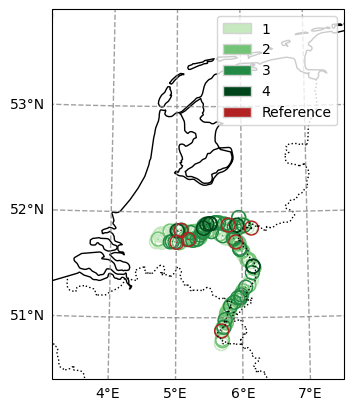

In [8]:
f, ax = plt.subplots(subplot_kw={'projection': ProjectCustomExtent(epsg=28992, extent=[-1000000, 500000, -100000, 800000])})
ax.set_extent((3.17, 7.5, 50.4, 53.9), crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
geomappy.plot_utils.add_ticks(ax, 1)
geomappy.plot_utils.add_gridlines(ax, 1, alpha=0.75)
ax.add_feature(
        cf.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '10m', facecolor='none', edgecolor='k'),
        label='Stereo', lw=1, linestyle=":")
ax.add_feature(cf.NaturalEarthFeature('physical', 'lakes', '10m', facecolor='none', edgecolor='black'))

ax, legend = mp.plot_classified_shapes(
    df=temp_df,
    values='granulaat_korrels',
    s=1,
    legend='legend',
    ax=ax,
    colors=mp.colors.colors_discrete("Greens", 5)[1:].tolist() + ["Firebrick"],
    linewidth=10,
    labels=["1", "2", "3", "4", "Reference"],
    transform=ccrs.PlateCarree(),
)

/usr/local/Caskroom/mambaforge/base/envs/geomappy/lib/python3.12/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/usr/local/Caskroom/mambaforge/base/envs/geomappy/lib/python3.12/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/usr/local/Caskroom/mambaforge/base/envs/geomappy/lib/python3.12/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/usr/local/Caskroom/mambaforge/base/envs/geomappy/lib/python3.12/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/usr/local/Caskroom/mambafor

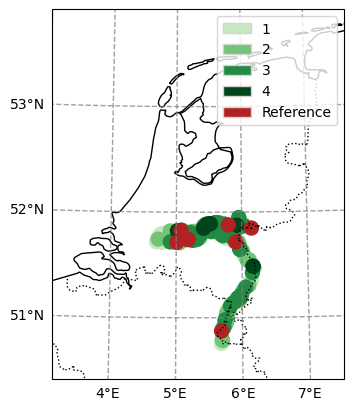

In [11]:
f, ax = plt.subplots(subplot_kw={'projection': ProjectCustomExtent(epsg=28992, extent=[-1000000, 500000, -100000, 800000])})
ax.set_extent((3.17, 7.5, 50.4, 53.9), crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
geomappy.plot_utils.add_ticks(ax, 1)
geomappy.plot_utils.add_gridlines(ax, 1, alpha=0.75)
ax.add_feature(
        cf.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '10m', facecolor='none', edgecolor='k'),
        label='Stereo', lw=1, linestyle=":")
ax.add_feature(cf.NaturalEarthFeature('physical', 'lakes', '10m', facecolor='none', edgecolor='black'))

col, legend = mp.plot_classified_shapes(
    df=temp_df,
    values='granulaat_korrels',
    s=100,
    legend='legend',
    ax=ax,
    colors=mp.colors.colors_discrete("Greens", 5)[1:].tolist() + ["Firebrick"],
    linewidth=1,
    labels=["1", "2", "3", "4", "Reference"],
    transform=ccrs.PlateCarree()
)